In [ ]:
!pip install kaggle


In [ ]:
import zipfile
import os

# Replace 'dataset-name.zip' with the name of the downloaded zip file
with zipfile.ZipFile('/content/140k-real-and-fake-face-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('content')  # Replace 'destination-folder' with your desired folder


FileNotFoundError: [Errno 2] No such file or directory: '/content/140k-real-and-fake-face-detection.zip'

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [ ]:
import cv2
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization # Import BatchNormalization directly from tensorflow.keras.layers
from tensorflow.keras.models import Sequential
#from tensorflow.python.keras.layers.normalization import BatchNormalization # No longer needed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [00:39<00:00, 133MB/s]
100% 3.75G/3.75G [00:39<00:00, 102MB/s]


In [ ]:
import zipfile
import os

# Replace 'dataset-name.zip' with the name of the downloaded zip file
with zipfile.ZipFile('/content/140k-real-and-fake-faces.zip', 'r') as zip_ref:
    zip_ref.extractall('D:/real_vs_fake/real-vs-fake/')  # Replace 'destination-folder' with your desired folder


In [ ]:
datapath = 'D:/real_vs_fake/real-vs-fake/eal_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
     '/content/D:/real_vs_fake/real-vs-fake/real_vs_fake/real-vs-fake/train/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    '/content/D:/real_vs_fake/real-vs-fake/real_vs_fake/real-vs-fake/valid/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
     '/content/D:/real_vs_fake/real-vs-fake/real_vs_fake/real-vs-fake/test/', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = np.random.randint(20000)
    fig, ax = plt.subplots(3,3, figsize=(8,8))
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    plt.suptitle(set_ + ' faces from train dataset')
    return plt

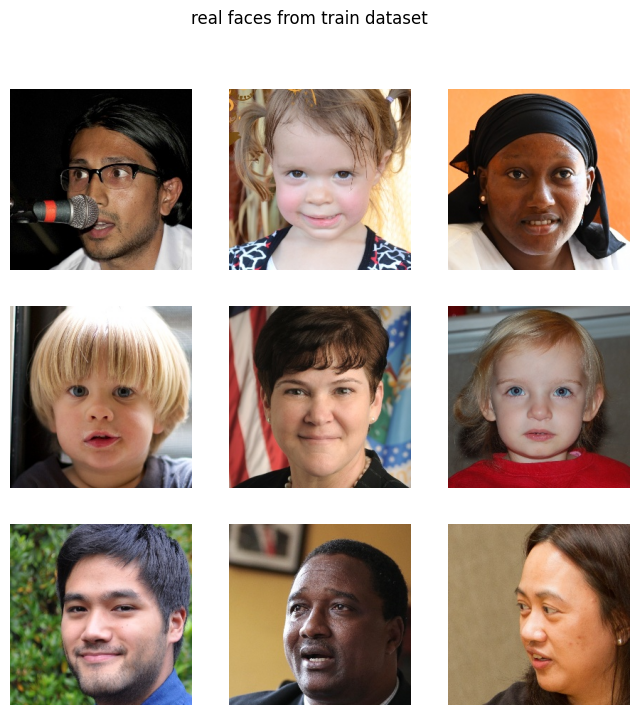

In [ ]:
plot_img('/content/D:/real_vs_fake/real-vs-fake/real_vs_fake/real-vs-fake/', 'real').show()

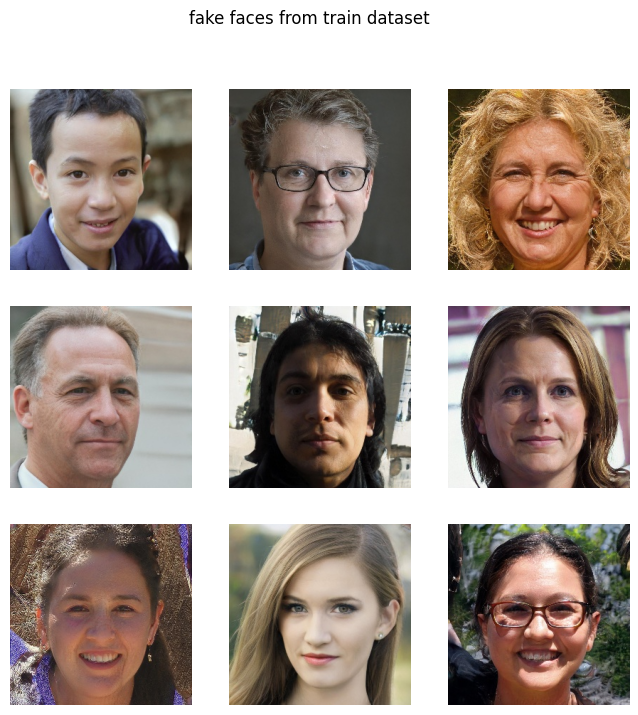

In [ ]:
plot_img('/content/D:/real_vs_fake/real-vs-fake/real_vs_fake/real-vs-fake/', 'fake').show()

⚽

In [ ]:
input_shape = (224,224,3)
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                        

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.Adam.

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, weight_decay=1e-6) # Use weight_decay instead of decay
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = "saved-final-model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
train_steps = 80000//64
valid_steps = 5000//64

history = model.fit_generator(
    train_flow,
    epochs =4,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

<ipython-input-30-3bdb8203efa0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/4
1250/1250 [==============================] - ETA: 0s - loss: 0.4698 - accuracy: 0.7832
Epoch 1: val_accuracy improved from -inf to 0.85757, saving model to saved-final-model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 314s 239ms/step - loss: 0.4698 - accuracy: 0.7832 - val_loss: 0.3485 - val_accuracy: 0.8576
Epoch 2/4
1250/1250 [==============================] - ETA: 0s - loss: 0.2085 - accuracy: 0.9158
Epoch 2: val_accuracy improved from 0.85757 to 0.95212, saving model to saved-final-model.h5
1250/1250 [==============================] - 269s 215ms/step - loss: 0.2085 - accuracy: 0.9158 - val_loss: 0.1259 - val_accuracy: 0.9521
Epoch 3/4
1250/1250 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9514
Epoch 3: val_accuracy did not improve from 0.95212
1250/1250 [==============================] - 260s 208ms/step - loss: 0.1252 - accuracy: 0.9514 - val_loss: 0.1916 - val_accuracy: 0.9291
Epoch 4/4
1250/1250 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9656
Epoch 4: val_accuracy improved from 0.95212 to 0.96695, saving model to saved-final-model.h5
1250/1250 [==============================] - 259s 207ms/step 

In [ ]:
history = model.fit_generator(
    train_flow,
    epochs =2,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

<ipython-input-31-73b8daf9ae8b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
1250/1250 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9739
Epoch 1: val_accuracy improved from 0.96695 to 0.96735, saving model to saved-final-model.h5
1250/1250 [==============================] - 258s 206ms/step - loss: 0.0686 - accuracy: 0.9739 - val_loss: 0.0833 - val_accuracy: 0.9673
Epoch 2/2
1250/1250 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9781
Epoch 2: val_accuracy did not improve from 0.96735
1250/1250 [==============================] - 257s 206ms/step - loss: 0.0594 - accuracy: 0.9781 - val_loss: 0.1268 - val_accuracy: 0.9505


In [ ]:
model.save("saved-final-model-1.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

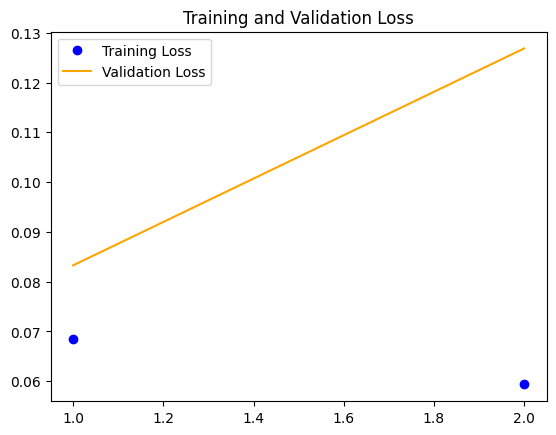

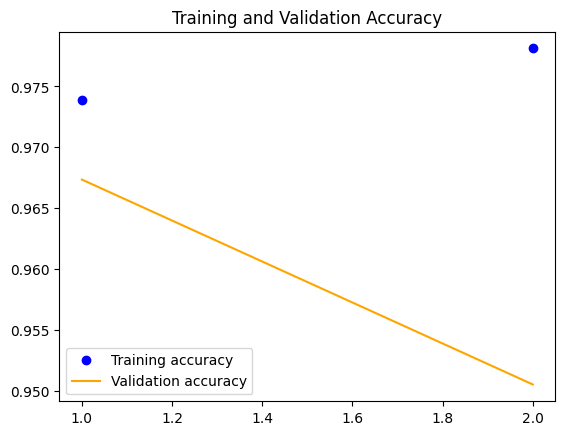

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 82s 4ms/step


In [ ]:
results = confusion_matrix(y_test, y_pred > 0.5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues')
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [ ]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
i = np.random.randint(20000)
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")